<a href="https://colab.research.google.com/github/jpdicarvalho/Modelos-Estatisticos-Preditivos/blob/main/Regress%C3%A3o_Linear_Previs%C3%A3o_para_o_ano_de_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

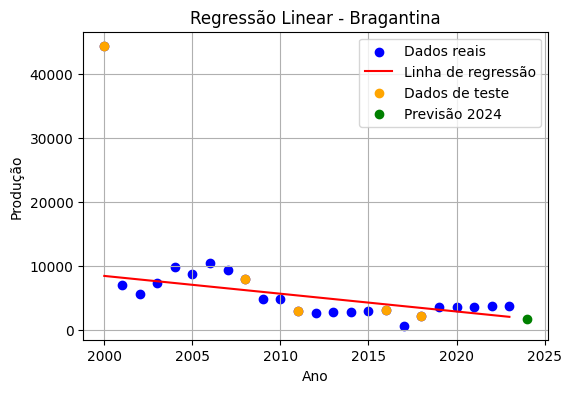

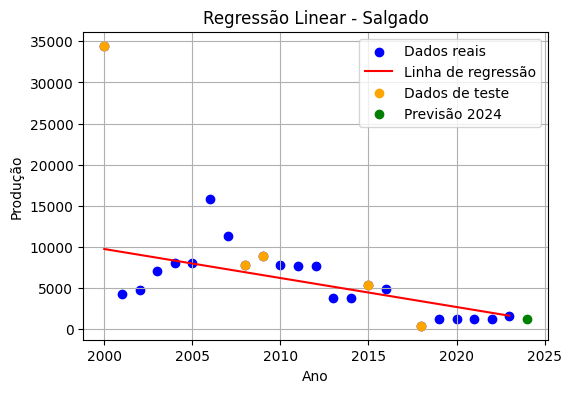

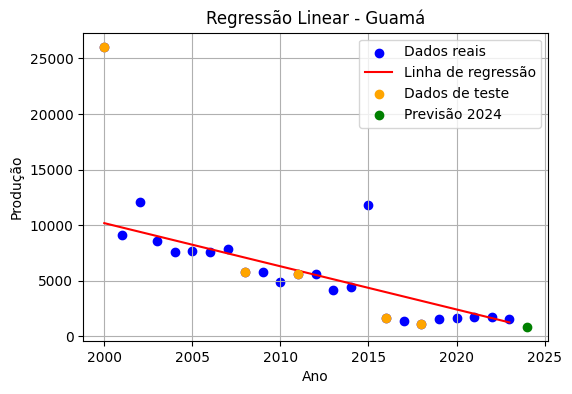

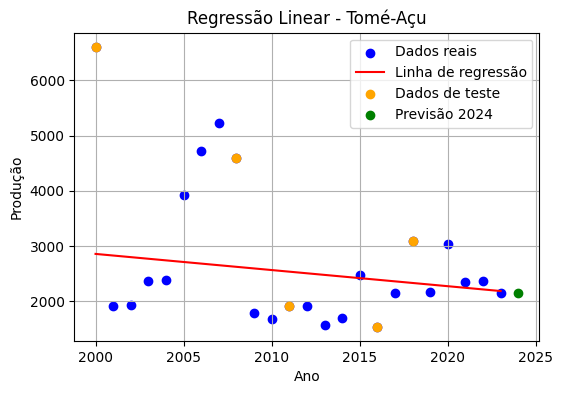

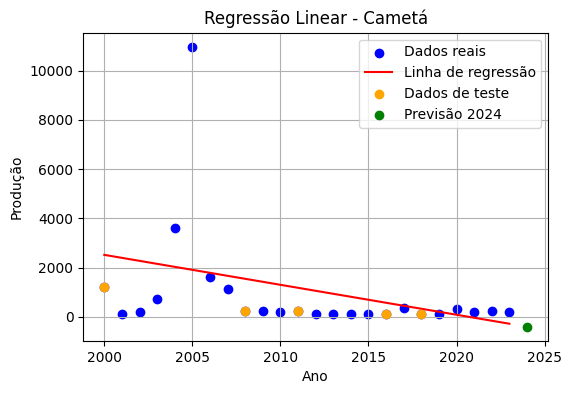

       Região     Intercepto  Coeficiente  R² Treino  R² Teste          MAE  \
0  Bragantina  564294.099598  -277.909345   0.508046  0.013651  8444.952783   
1     Salgado  714765.301270  -352.506350   0.426729  0.113385  6376.456875   
2       Guamá  786586.175553  -388.201040   0.651040  0.378702  4362.726828   
3    Tomé-Açu   61288.143863   -29.214733   0.043015 -0.131543  1588.821417   
4      Cametá  245700.027163  -121.591438   0.120330 -4.450591   841.682897   

            MSE          RMSE  Produção Estimada em 2024  
0  2.608939e+08  16152.210244                1805.585401  
1  1.253495e+08  11195.957408                1292.449110  
2  5.261362e+07   7253.524571                 867.271462  
3  3.926305e+06   1981.490512                2157.524592  
4  9.086998e+05    953.257483                -401.042365  


,Região,Intercepto,Coeficiente,R² Treino,R² Teste,MAE,MSE,RMSE,Produção Estimada em 2024
0,Bragantina,564294.099598,-277.909345,0.508046,0.013651,8444.952783,2.608939e+08,16152.210244,1805.585401
1,Salgado,714765.301270,-352.506350,0.426729,0.113385,6376.456875,1.253495e+08,11195.957408,1292.449110
2,Guamá,786586.175553,-388.201040,0.651040,0.378702,4362.726828,5.261362e+07,7253.524571,867.271462
3,Tomé-Açu,61288.143863,-29.214733,0.043015,-0.131543,1588.821417,3.926305e+06,1981.490512,2157.524592
4,Cametá,245700.027163,-121.591438,0.120330,-4.450591,841.682897,9.086998e+05,953.257483,-401.042365


In [1]:
# Recarregar as bibliotecas necessárias após a reinicialização do estado de execução
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Recarregar os dados fornecidos para análise
data = {
    "Year": list(range(2000, 2024)),
    "Bragantina": [44440, 7031, 5646, 7394, 9906, 8728, 10512, 9448, 8003, 4943, 4879, 3071, 2717, 2868, 2868, 2955, 3177, 695, 2163, 3600, 3581, 3669, 3803, 3816],
    "Salgado": [34464, 4254, 4724, 7114, 8102, 8071, 15875, 11323, 7807, 8931, 7766, 7672, 7672, 3828, 3828, 5433, 4926, None, 430, 1250, 1250, 1250, 1300, 1668],
    "Guamá": [26052, 9103, 12086, 8562, 7551, 7692, 7554, 7893, 5761, 5771, 4916, 5629, 5652, 4152, 4440, 11820, 1682, 1410, 1144, 1572, 1687, 1779, 1697, 1592],
    "Tomé-Açu": [6608, 1914, 1932, 2363, 2379, 3920, 4712, 5220, 4601, 1781, 1684, 1924, 1924, 1569, 1706, 2471, 1541, 2150, 3088, 2176, 3031, 2353, 2360, 2155],
    "Cametá": [1195, 132, 216, 705, 3600, 10969, 1634, 1114, 244, 244, 204, 254, 120, 120, 120, 120, 120, 360, 120, 120, 300, 200, 220, 213]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Função para dividir os dados em treino e teste, treinar o modelo e avaliar desempenho
def train_and_evaluate_model(data, regions):
    results = []

    for region in regions:
        region_data = np.array(data[region], dtype=float)  # Garantir tipo float

        # Remover valores nulos para treinamento
        valid_indices = ~np.isnan(region_data)
        years_valid = np.array(data["Year"])[valid_indices].reshape(-1, 1)
        values_valid = region_data[valid_indices]

        # Dividir os dados em treino (80%) e teste (20%)
        X_train, X_test, y_train, y_test = train_test_split(years_valid, values_valid, test_size=0.2, random_state=42)

        # Regressão linear
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Previsão para os dados de teste
        y_pred = model.predict(X_test)

        # Métricas de erro
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Previsão para 2024
        future_year = np.array([[2024]])
        future_prediction = model.predict(future_year)

        # Coeficientes do modelo
        intercept = model.intercept_
        coefficient = model.coef_[0]

        # Armazenar os resultados
        results.append({
            "Região": region,
            "Intercepto": intercept,
            "Coeficiente": coefficient,
            "R² Treino": model.score(X_train, y_train),
            "R² Teste": r2,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "Produção Estimada em 2024": future_prediction[0]
        })

        # Gráfico para a região
        plt.figure(figsize=(6, 4))
        plt.scatter(years_valid, values_valid, color="blue", label="Dados reais")
        plt.plot(years_valid, model.predict(years_valid.reshape(-1, 1)), color="red", label="Linha de regressão")
        plt.scatter(X_test, y_test, color="orange", label="Dados de teste", zorder=5)
        plt.scatter(2024, future_prediction, color="green", label="Previsão 2024", zorder=6)
        plt.title(f"Regressão Linear - {region}")
        plt.xlabel("Ano")
        plt.ylabel("Produção")
        plt.legend()
        plt.grid()
        plt.show()

    return pd.DataFrame(results)

# Lista de regiões para análise
regions = ["Bragantina", "Salgado", "Guamá", "Tomé-Açu", "Cametá"]

# Executar modelo com divisão entre treino e teste
results_with_evaluation = train_and_evaluate_model(data, regions)

# Exibir tabela com previsões e métricas
print(results_with_evaluation)

# Se estiver rodando no Jupyter Notebook ou Colab, use display() para melhor visualização
from IPython.display import display
display(results_with_evaluation)